## Logistic Regression using `Optim.jl`

In [1]:
using Pkg
Pkg.activate(".")
using CSV
using DataFrames
using PyPlot
using Optim

  Activating project at `~/Documents/CODE/ACN6348`


## Loading the dataset

In [2]:
path = joinpath(pwd(),"data","spam.csv")
spam = CSV.read(path,DataFrame)
first(spam,4) # show only first four rows

,crl.tot,dollar,bang,money,n000,make,yesno
,Int64,Float64,Float64,Float64,Float64,Float64,String1
1,278,0.0,0.778,0.0,0.0,0.0,y
2,1028,0.18,0.372,0.43,0.43,0.21,y
3,2259,0.184,0.276,0.06,1.16,0.06,y
4,191,0.0,0.137,0.0,0.0,0.0,y


## Extracting input patterns and targets

In [3]:
S = select(spam, Not(:yesno)) |> Matrix
y = spam.yesno .== "y";

In [6]:
sigmoid(x) = (1 + exp(-x)).^-1

sigmoid (generic function with 1 method)

In [8]:
SS = [ones(size(S,1)) S];

## Empirical Risk Function

In [9]:
function erf(θ)
    n = length(y)
    yhat = sigmoid.(SS*θ)
    sum(1/n*(-y .* log.(yhat)) .- ((1 .- y) .* log.(1 .- yhat)))
end

erf (generic function with 1 method)

In [12]:
initialtheta = zeros(size(SS,2),1);

## Running Gradient Descent 

In [32]:
res = optimize(erf,initialtheta, GradientDescent(), Optim.Options(store_trace=true))

 * Status: success

 * Candidate solution
    Final objective value:     5.278047e+02

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 7.59e+03 ≰ 1.0e-08

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    3
    f(x) calls:    173
    ∇f(x) calls:   173


## Extracting Learned Parameters

In [14]:
thetas = Optim.minimizer(res)

7×1 Matrix{Float64}:
 -0.0002775281969373383
 -0.04480061277932013
 -3.2263975582861476e-6
 -3.0507684247597087e-5
 -4.748525188150495e-6
 -1.9575721010258256e-6
 -2.0389455253283643e-5

## Visualizing the `gradnorm`

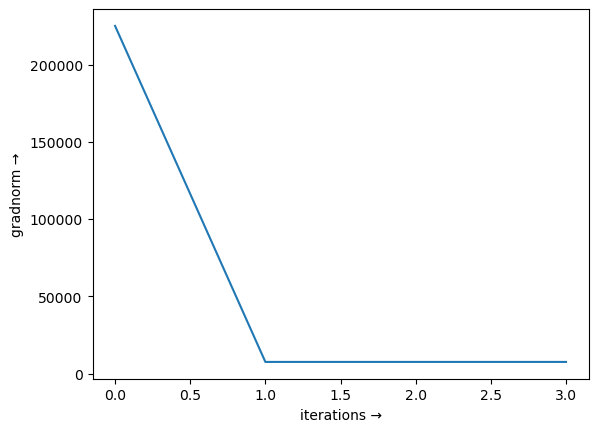

In [34]:
figure()
plot(Optim.g_norm_trace(res))
xlabel("iterations →")
ylabel("gradnorm →");